In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/HPG_model.xlsx")

In [ ]:
df.head()

,Date,Open,Price,High,Low,Vol
0,2018-01-02,11790,11991,12004,11677,15730000
1,2018-01-03,12066,11966,12192,11891,18510000
2,2018-01-04,12016,12117,12167,11966,17790000
3,2018-01-05,12092,12066,12180,11978,14030000
4,2018-01-08,11991,12444,12444,11941,14190000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1308 non-null   datetime64[ns]
 1   Open    1308 non-null   int64         
 2   Price   1308 non-null   int64         
 3   High    1308 non-null   int64         
 4   Low     1308 non-null   int64         
 5   Vol     1308 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 61.4 KB


In [ ]:
df2 =df.set_index('Date')

In [ ]:
df2.columns

Index(['Open', 'Price', 'High', 'Low', 'Vol'], dtype='object')

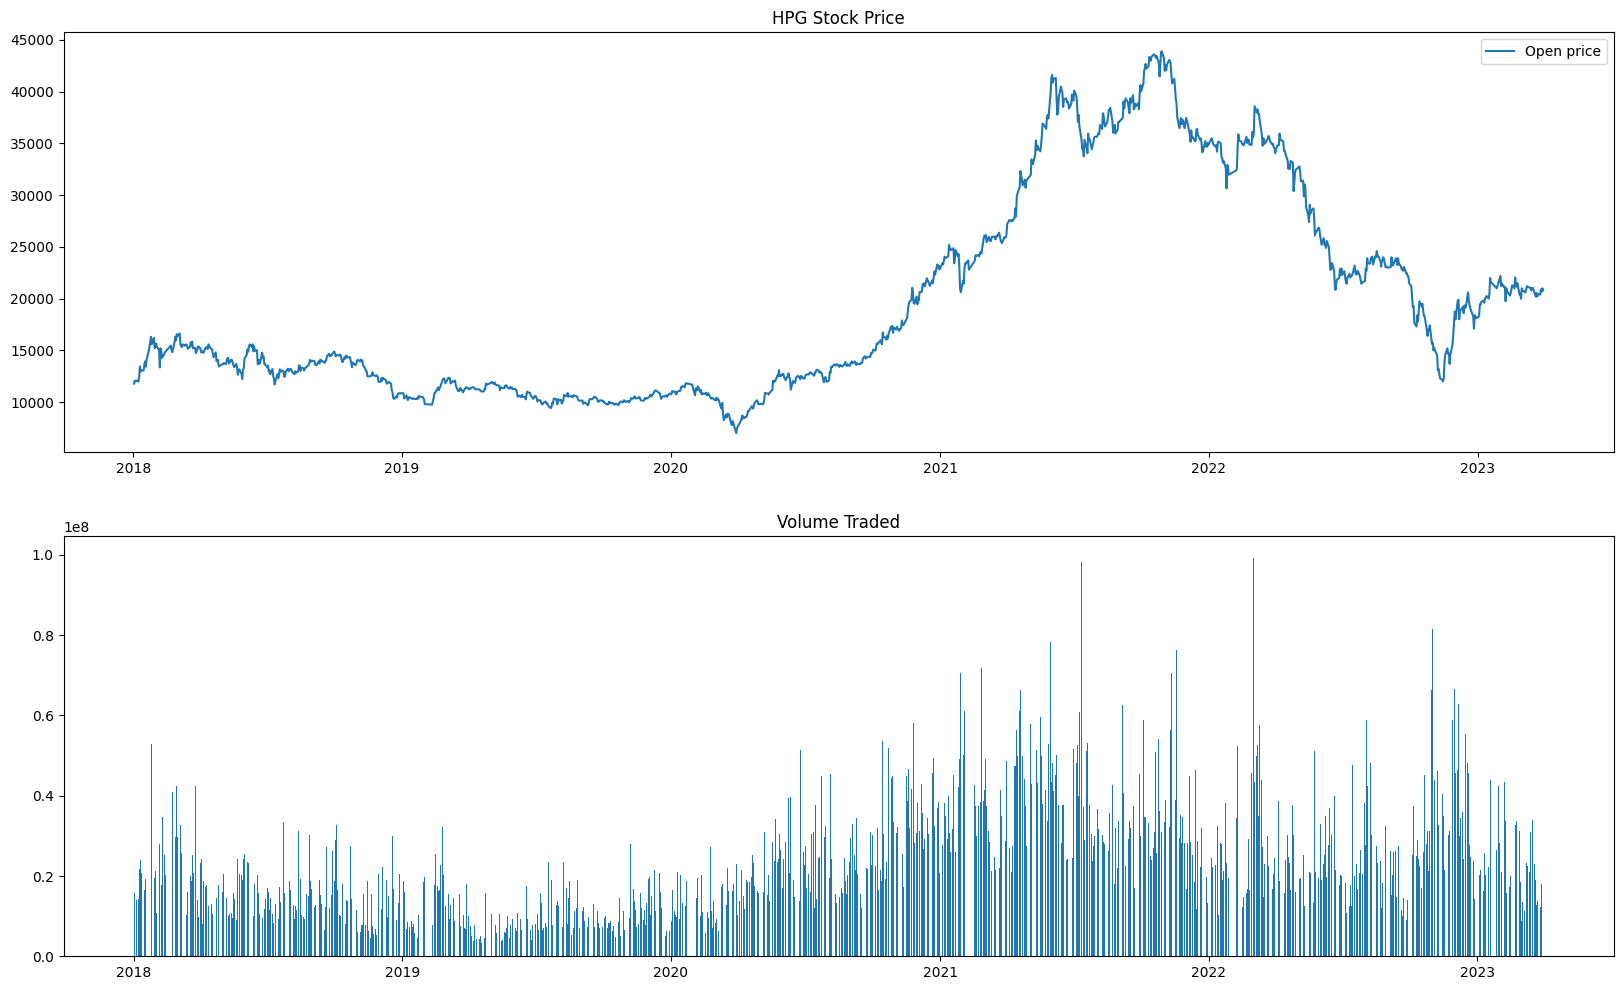

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('HPG Stock Price')
plt.plot(df2.Open,label='Open price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Vol'])
plt.show()


# ARIMA Model:-


In [ ]:
data = list(df2["Open"])

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.1946344763211874
2. P-Value :  0.6758995553157982
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 1294
5. Critical Values :
	 1% :  -3.4354136163971782
	 5% :  -2.8637761637845895
	 10% :  -2.5679605492954045


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.3 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
x_train= data[:int(len(data)*0.8)]
x_test = data[int(len(data)*0.8):]
print(len(x_train),len(x_test))

1046 262


In [ ]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20125.504, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20126.116, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20121.813, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20121.608, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20124.335, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20123.510, Time=1.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=20123.426, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20125.678, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=20119.872, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=20121.773, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=20121.694, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=20120.072, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=20118.008, Time=1.07 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=20123.716, Time=0.86 sec
 ARIMA(1,1,3)(0,0,0

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,1,3))

In [ ]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1308
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -10052.403
Date:                Sun, 28 May 2023   AIC                          20116.807
Time:                        08:27:26   BIC                          20147.860
Sample:                             0   HQIC                         20128.455
                               - 1308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0279      0.051      0.542      0.588      -0.073       0.129
ar.L2          0.8892      0.053     16.665      0.000       0.785       0.994
ma.L1         -0.1012      0.051     -1.998      0.046      -0.200      -0.002
ma.L2         -0.8933      0.051    -17.554      0.000      -0.993      -0.794
ma.L3          0.1071      0.021      5.072      0.000       0.066       0.149
sigma2      2.835e+05   7215.522     39.283      0.000    2.69e+05    2.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               540.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               4.51   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
residuals = pd.DataFrame(model_fit.resid)

<Axes: ylabel='Density'>

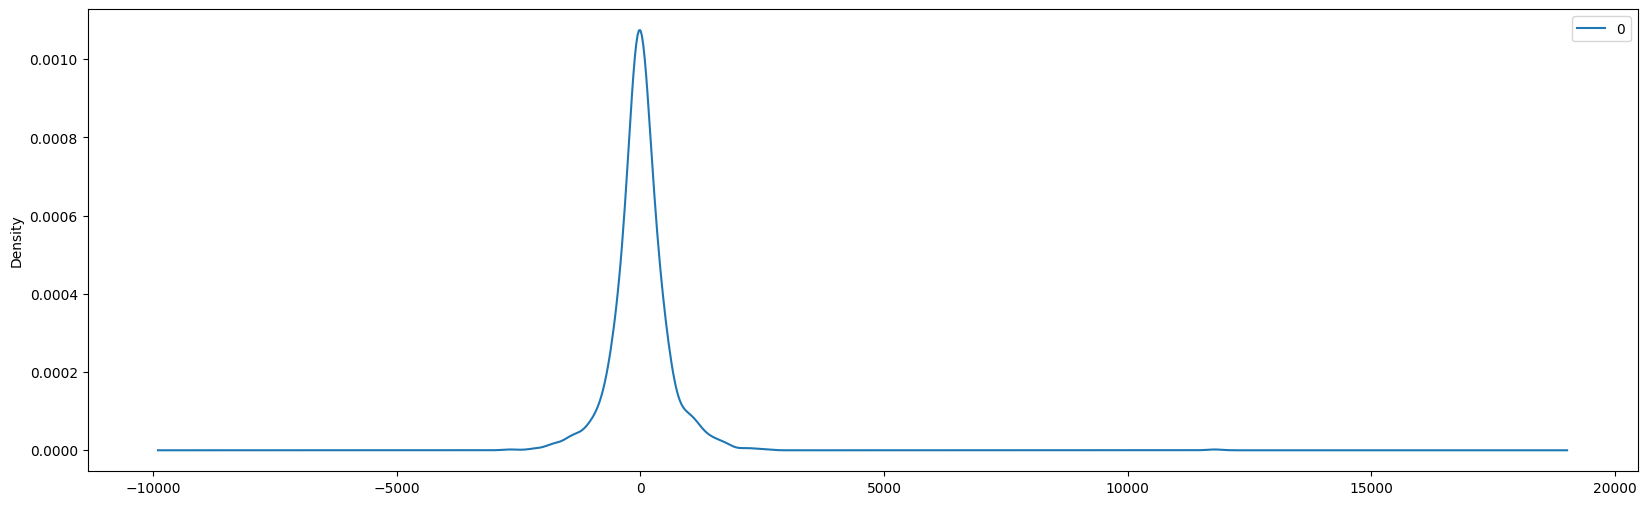

In [ ]:
residuals.plot(kind = "kde", figsize=(20,6))

In [ ]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model_fit.predict(start=start,end=end)
pred

In [ ]:
s = pd.Series(pred, index = df2.index[int(len(data)*0.8):])
s

<function matplotlib.pyplot.show(close=None, block=None)>

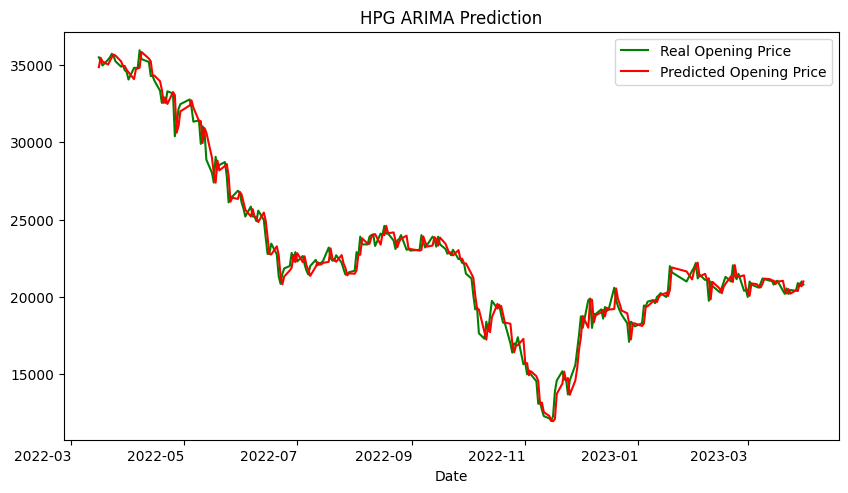

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Open'][int(len(data)*0.8):].plot(label='Real Opening Price', color = "green", legend=True)
s.plot(label='Predicted Opening Price', color = "red", legend=True)
plt.xticks(rotation=0)
plt.title("HPG ARIMA Prediction")
plt.show

In [ ]:
# report performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
r2 = r2_score(x_test, pred)
print("R square", r2)
mae = mean_absolute_error(x_test, pred)
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(x_test, pred))
print('RMSE: ',rmse)
mape = np.mean(np.abs(pred - x_test)/np.abs(x_test))
print('MAPE: ',mape)

R square 0.9853412960741947
MAE:  500.4937133364111
RMSE:  664.4504014018988
MAPE:  0.023405974235868342
